## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

# Best Classifiers

## XGBoost
### Train Acc= 0.9417040358744395
### Test Acc= 0.7081339712918661

## Random Forest
### Train Acc= 0.952914798206278
### Test Acc= 0.7511961722488039

## Soft Voting
### Test Acc= 0.7679372197309418
### Train Acc= 0.6602870813397129

## KNN(k=6)
### Train Acc= 0.743274
### Test Acc= 0.655502

## Out of Bag on DecisionTree
### Train Accuracy 0.952914798206278
### Test Accuracy 0.7416267942583732
### OOB Score 0.7982062780269058

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
#set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(892, 43)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train[['famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu', 'famrel']] 
#[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
X_test = X_test[['famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu', 'famrel']] 
#X_test = X_test.drop(columns = 'alc')

In [7]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [9]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Finding suitable value of k for KNN

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

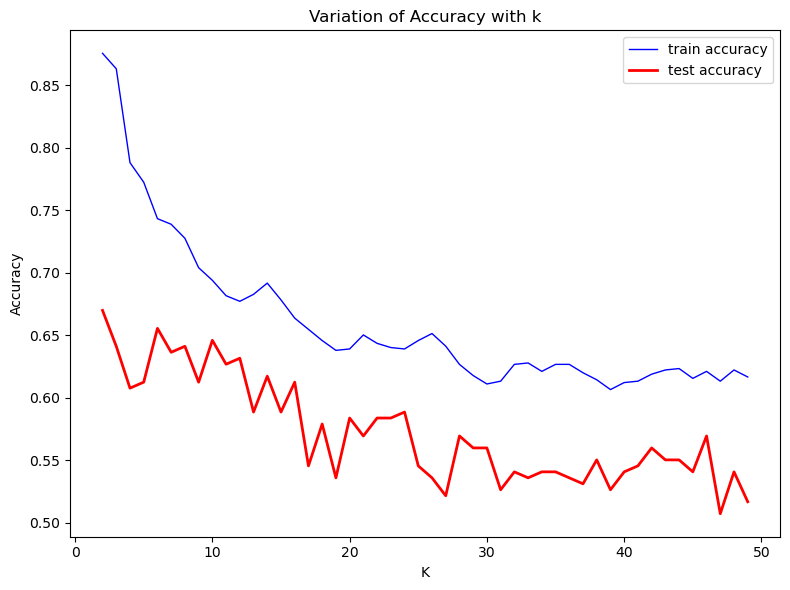

In [12]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [13]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.875561  0.669856
1    3   0.863229  0.641148
2    4   0.788117  0.607656
3    5   0.772422  0.612440
4    6   0.743274  0.655502
5    7   0.738789  0.636364
6    8   0.727578  0.641148
7    9   0.704036  0.612440
8   10   0.693946  0.645933
9   11   0.681614  0.626794
10  12   0.677130  0.631579
11  13   0.682735  0.588517
12  14   0.691704  0.617225
13  15   0.678251  0.588517
14  16   0.663677  0.612440
15  17   0.654709  0.545455
16  18   0.645740  0.578947
17  19   0.637892  0.535885
18  20   0.639013  0.583732
19  21   0.650224  0.569378
20  22   0.643498  0.583732
21  23   0.640135  0.583732
22  24   0.639013  0.588517
23  25   0.645740  0.545455
24  26   0.651345  0.535885
25  27   0.641256  0.521531
26  28   0.626682  0.569378
27  29   0.617713  0.559809
28  30   0.610987  0.559809
29  31   0.613229  0.526316
30  32   0.626682  0.540670
31  33   0.627803  0.535885
32  34   0.621076  0.540670
33  35   0.626682  0.540670
34  36   0.626682  0.535885
35  37   0.619955  0.531100
36  38   0.614350  0.550239
37  39   0.606502  0.526316
38  40   0.612108  0.540670
39  41   0.613229  0.545455
40  42   0.618834  0.559809
41  43   0.622197  0.550239
42  44   0.623318  0.550239
43  45   0.615471  0.540670
44  46   0.621076  0.569378
45  47   0.613229  0.507177
46  48   0.622197  0.540670
47  49   0.616592  0.516746

## Applying suitable value of k in KNN Classifier

In [14]:
best_grid_knn= KNeighborsClassifier(n_neighbors=6)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[94 33]
 [39 43]]
Accuracy Score 0.6555023923444976
Classification report:               precision    recall  f1-score   support

         0.0       0.71      0.74      0.72       127
         1.0       0.57      0.52      0.54        82

    accuracy                           0.66       209
   macro avg       0.64      0.63      0.63       209
weighted avg       0.65      0.66      0.65       209



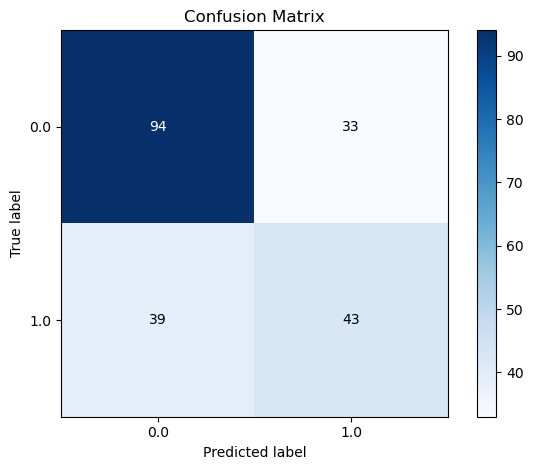

In [15]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Classification Report for Train Set
Accuracy Score 0.7432735426008968
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       446
         1.0       0.81      0.63      0.71       446

    accuracy                           0.74       892
   macro avg       0.76      0.74      0.74       892
weighted avg       0.76      0.74      0.74       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

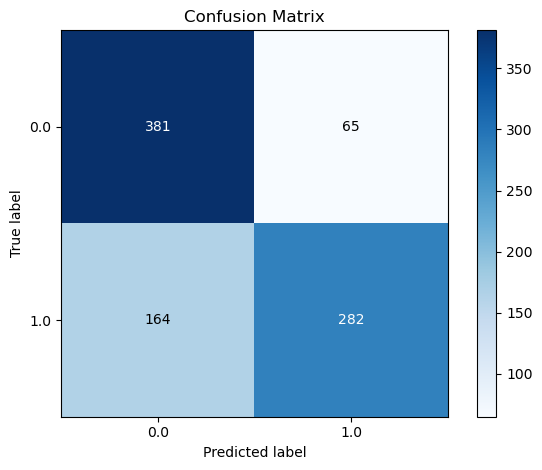

In [16]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_knn.predict(X_train));
save_fig('Train Set Confusion Matrix train for KNN hyper-para tuned q3')

## Hyperparameter Tuning on Decision Tree

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [106]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth' : range(2,4),
}

In [107]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 4)},
             verbose=2)

In [108]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=3)

## Appying best estimators on Decision Tree

[[104  23]
 [ 57  25]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0       0.65      0.82      0.72       127
         1.0       0.52      0.30      0.38        82

    accuracy                           0.62       209
   macro avg       0.58      0.56      0.55       209
weighted avg       0.60      0.62      0.59       209



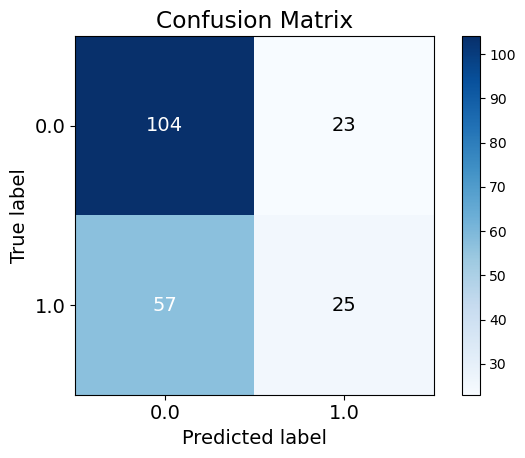

In [109]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

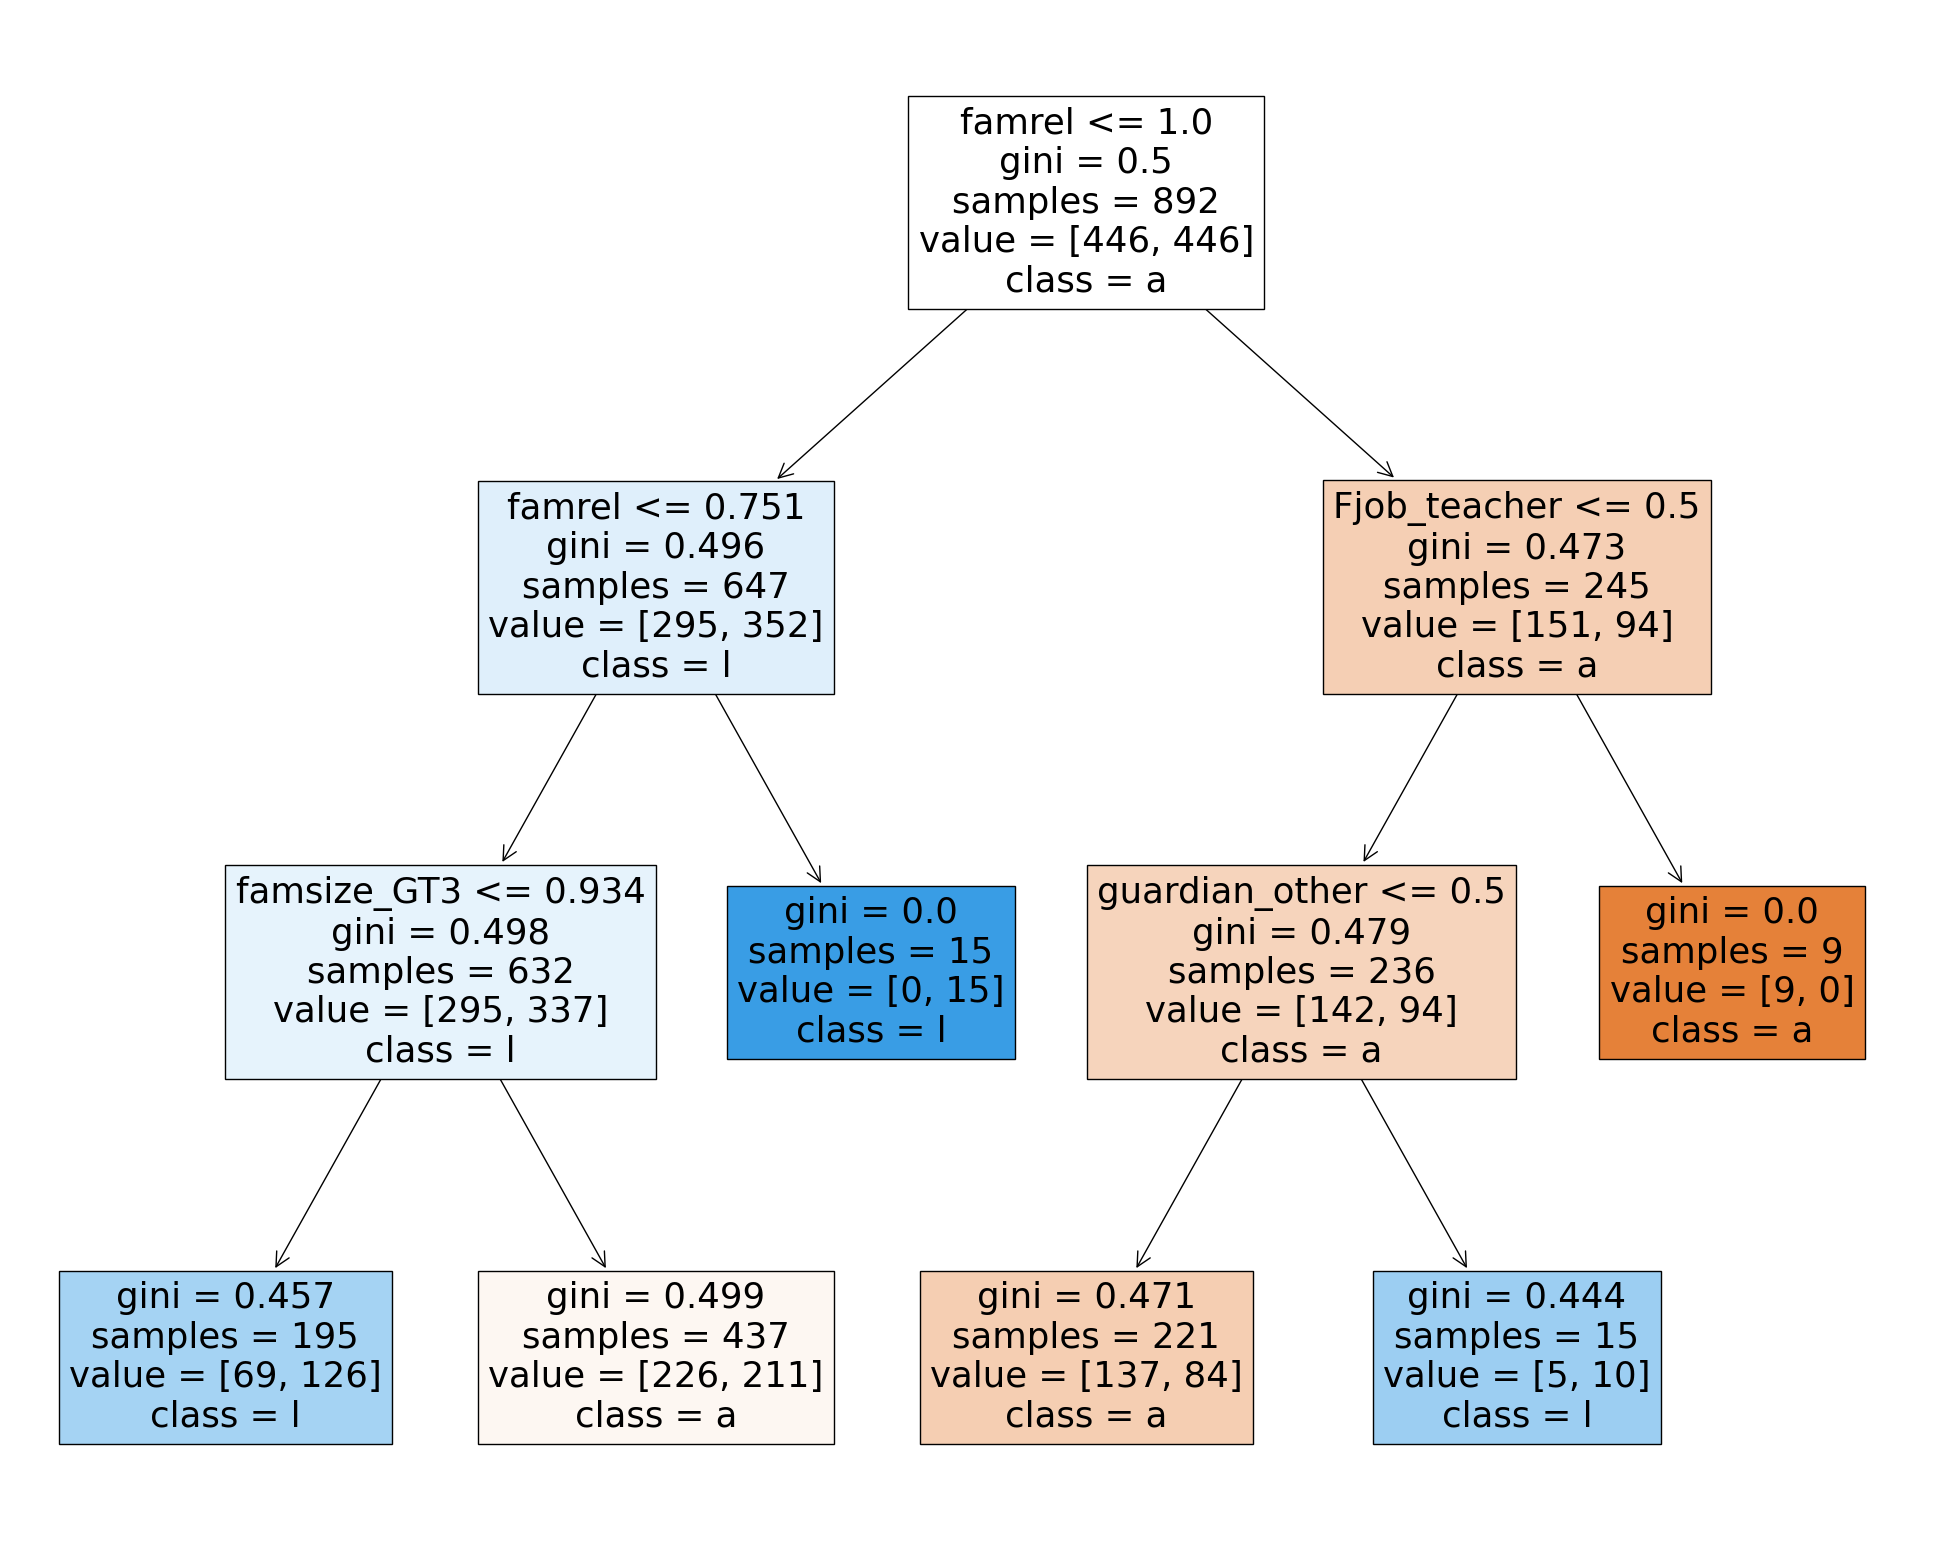

In [110]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [111]:
fig.savefig("decision_tree Q3.png")

Max Depth =  1 , Train Acc. =  0.564 , Test Acc. =  0.469
Max Depth =  2 , Train Acc. =  0.564 , Test Acc. =  0.469
Max Depth =  3 , Train Acc. =  0.586 , Test Acc. =  0.617
Max Depth =  4 , Train Acc. =  0.592 , Test Acc. =  0.474
Max Depth =  5 , Train Acc. =  0.65 , Test Acc. =  0.536
Max Depth =  6 , Train Acc. =  0.686 , Test Acc. =  0.517
Max Depth =  7 , Train Acc. =  0.72 , Test Acc. =  0.579
Max Depth =  8 , Train Acc. =  0.749 , Test Acc. =  0.574
Max Depth =  9 , Train Acc. =  0.777 , Test Acc. =  0.593
Max Depth =  10 , Train Acc. =  0.813 , Test Acc. =  0.608
Max Depth =  11 , Train Acc. =  0.831 , Test Acc. =  0.627
Max Depth =  12 , Train Acc. =  0.85 , Test Acc. =  0.67
Max Depth =  13 , Train Acc. =  0.871 , Test Acc. =  0.646
Max Depth =  14 , Train Acc. =  0.886 , Test Acc. =  0.689
Max Depth =  15 , Train Acc. =  0.899 , Test Acc. =  0.684
Max Depth =  16 , Train Acc. =  0.917 , Test Acc. =  0.737
Max Depth =  17 , Train Acc. =  0.932 , Test Acc. =  0.727
Max Depth 

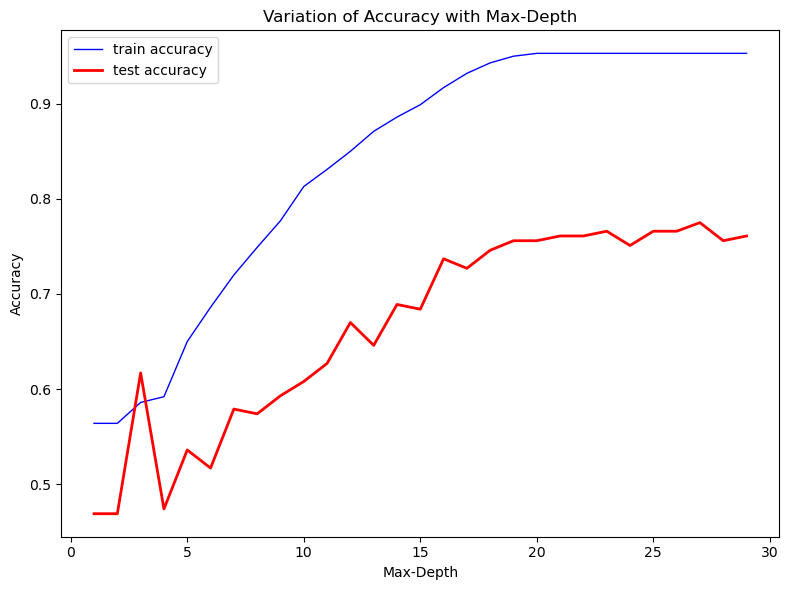

In [24]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [25]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


0    1
0  289  157
1   93  353

In [26]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


0   1
0  61  66
1  22  60

In [27]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70       446
         1.0       0.69      0.79      0.74       446

    accuracy                           0.72       892
   macro avg       0.72      0.72      0.72       892
weighted avg       0.72      0.72      0.72       892



In [28]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.73      0.48      0.58       127
         1.0       0.48      0.73      0.58        82

    accuracy                           0.58       209
   macro avg       0.61      0.61      0.58       209
weighted avg       0.63      0.58      0.58       209



## Hyperparameter Tuning on Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [30]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [31]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [32]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=50)

## Applying best estimators in Random Forest

In [33]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=50)

### Train

[[431  15]
 [ 27 419]]
Accuracy Score 0.952914798206278
Classification report: 
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       446
         1.0       0.97      0.94      0.95       446

    accuracy                           0.95       892
   macro avg       0.95      0.95      0.95       892
weighted avg       0.95      0.95      0.95       892



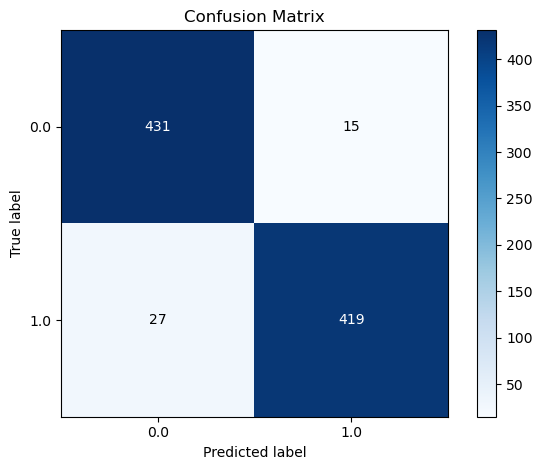

In [34]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test

In [35]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[94 33]
 [19 63]]
Accuracy Score 0.7511961722488039
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78       127
         1.0       0.66      0.77      0.71        82

    accuracy                           0.75       209
   macro avg       0.74      0.75      0.75       209
weighted avg       0.76      0.75      0.75       209



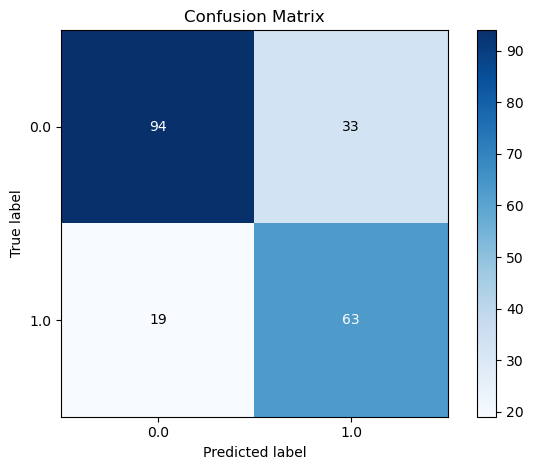

In [36]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q3')

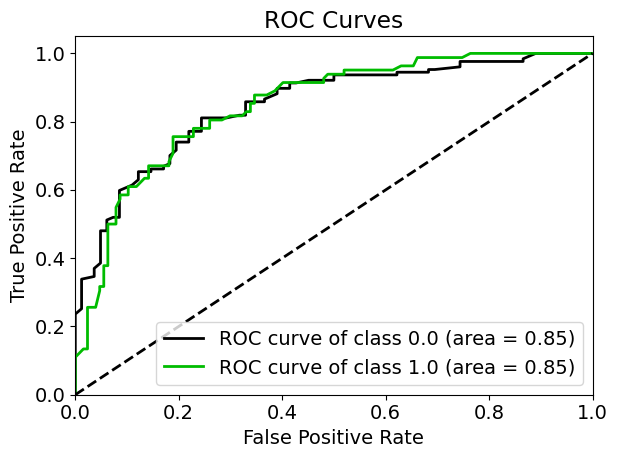

In [103]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q3')
plt.show();

## Hyperparameter Tuning on Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [39]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; tota

[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=50; total time=   0.0s[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.8s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_fea

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aymanibnehakim/opt/anaco

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [40]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression()

In [41]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)

LogisticRegression()

### Train Set

[[259 187]
 [167 279]]
Accuracy Score 0.6031390134529148
Classification report: 
              precision    recall  f1-score   support

         0.0       0.61      0.58      0.59       446
         1.0       0.60      0.63      0.61       446

    accuracy                           0.60       892
   macro avg       0.60      0.60      0.60       892
weighted avg       0.60      0.60      0.60       892



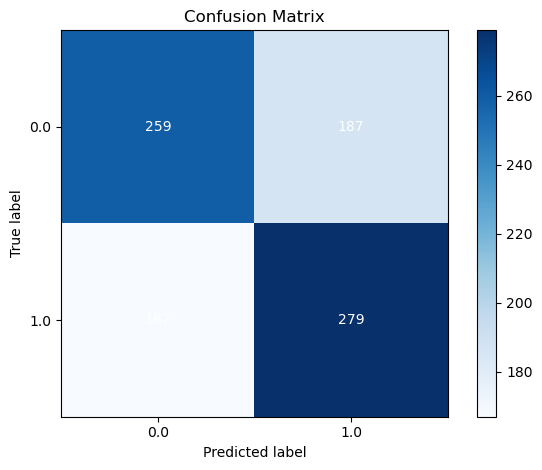

In [42]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[76 51]
 [31 51]]
Accuracy Score 0.6076555023923444
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65       127
         1.0       0.50      0.62      0.55        82

    accuracy                           0.61       209
   macro avg       0.61      0.61      0.60       209
weighted avg       0.63      0.61      0.61       209



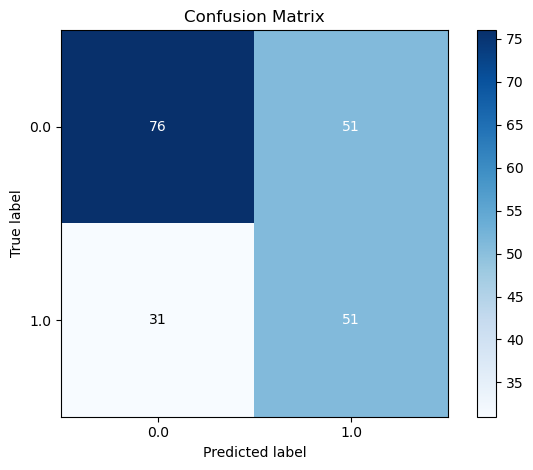

In [43]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [44]:
from sklearn.svm import SVC

In [45]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [46]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=g

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; to

[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=500; total time=   0.2s[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.8s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_fe

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.8s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   2.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estima

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2


[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] EN

[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion

[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.0s
[CV] END c

[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END ......penalty=l2, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l2, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l2, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l2, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l2, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l2, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END penalty=l2, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total tim


[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterio

[CV] END penalty=l2, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l2, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..........penalty=l2, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l2, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l2, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l2, random_state=None, solver=sag; total time=   0.0s
[CV] END penalty=elasticnet, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=elasticnet, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV]

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [47]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, probability=True, random_state=42)

In [48]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, probability=True, random_state=42)

### Train Set

[[312 134]
 [142 304]]
Accuracy Score 0.6905829596412556
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.70      0.69       446
         1.0       0.69      0.68      0.69       446

    accuracy                           0.69       892
   macro avg       0.69      0.69      0.69       892
weighted avg       0.69      0.69      0.69       892



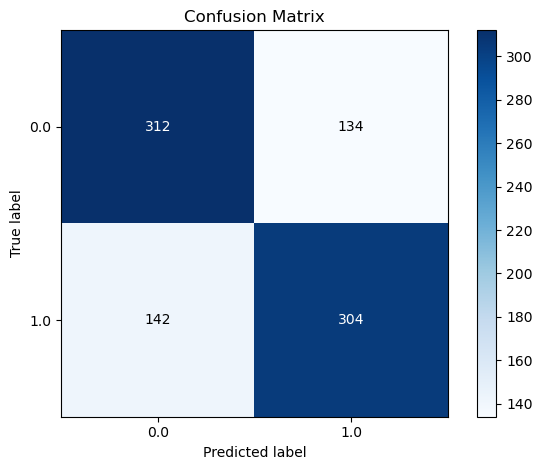

In [49]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[70 57]
 [32 50]]
Accuracy Score 0.5741626794258373
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.55      0.61       127
         1.0       0.47      0.61      0.53        82

    accuracy                           0.57       209
   macro avg       0.58      0.58      0.57       209
weighted avg       0.60      0.57      0.58       209



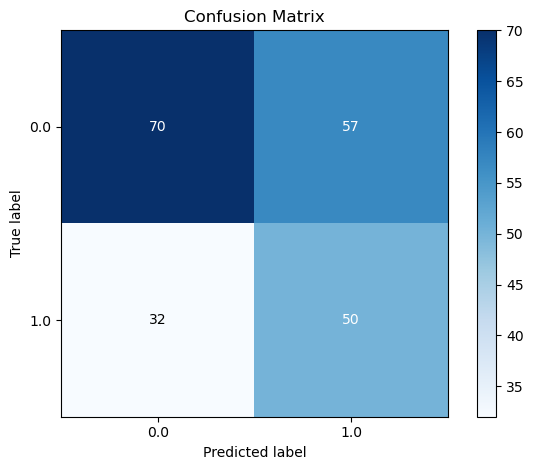

In [50]:

y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [51]:
from  sklearn.naive_bayes import MultinomialNB

In [52]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [53]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [54]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(alpha=0.01, fit_prior=False)

In [55]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01, fit_prior=False)

### Train Set

[[245 201]
 [180 266]]
Accuracy Score 0.5728699551569507
Classification report: 
              precision    recall  f1-score   support

         0.0       0.58      0.55      0.56       446
         1.0       0.57      0.60      0.58       446

    accuracy                           0.57       892
   macro avg       0.57      0.57      0.57       892
weighted avg       0.57      0.57      0.57       892



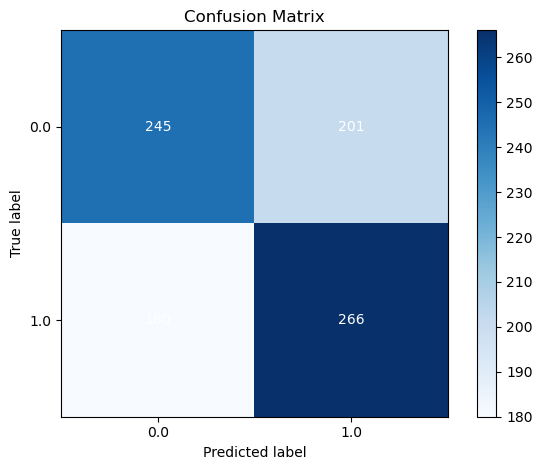

In [56]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[66 61]
 [35 47]]
Accuracy Score 0.5406698564593302
Classification report: 
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58       127
         1.0       0.44      0.57      0.49        82

    accuracy                           0.54       209
   macro avg       0.54      0.55      0.54       209
weighted avg       0.57      0.54      0.55       209



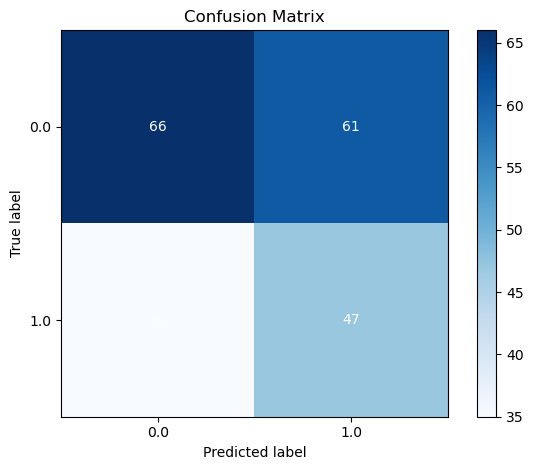

In [57]:
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [58]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [60]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('dt', DecisionTreeClassifier(max_depth=7)),
                             ('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features='sqrt',
                                                     n_estimators=50)),
                             ('svc',
                              SVC(break_ties=True, probability=True,
                                  random_state=42)),
                             ('nb',
                              MultinomialNB(alpha=0.01, fit_prior=False))])

In [61]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6555023923444976
DecisionTreeClassifier 0.5789473684210527
LogisticRegression 0.6076555023923444
RandomForestClassifier 0.7511961722488039
SVC 0.5741626794258373
MultinomialNB 0.5406698564593302
VotingClassifier 0.6746411483253588


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.7679372197309418
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78       446
         1.0       0.81      0.70      0.75       446

    accuracy                           0.77       892
   macro avg       0.77      0.77      0.77       892
weighted avg       0.77      0.77      0.77       892



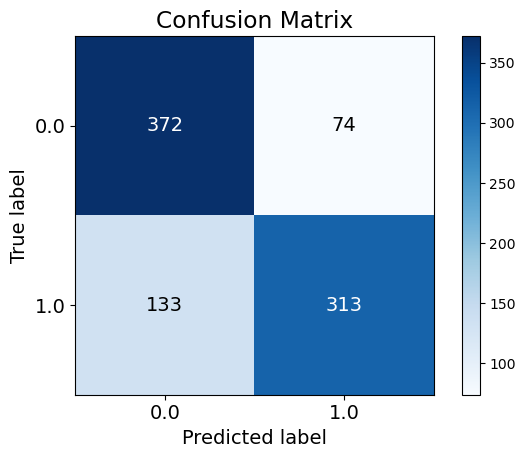

In [62]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.6746411483253588
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73       127
         1.0       0.58      0.62      0.60        82

    accuracy                           0.67       209
   macro avg       0.66      0.67      0.66       209
weighted avg       0.68      0.67      0.68       209



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

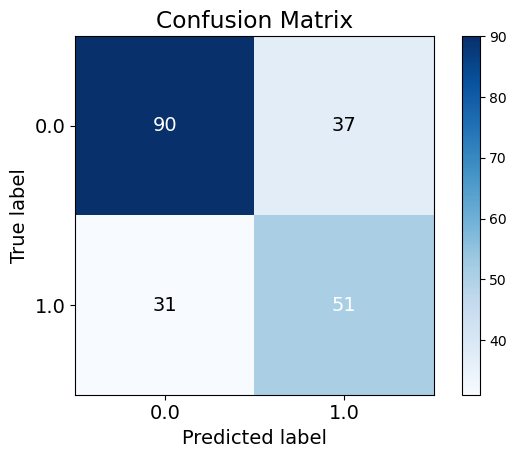

In [63]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [64]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('dt', DecisionTreeClassifier(max_depth=7)),
                             ('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features='sqrt',
                                                     n_estimators=50)),
                             ('svc',
                              SVC(break_ties=True, probability=True,
                                  random_state=42)),
                             ('nb',
                              MultinomialNB(alpha=0.01, fit_prior=False))],
                 voting='soft')

In [65]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6555023923444976
DecisionTreeClassifier 0.5789473684210527
LogisticRegression 0.6076555023923444
RandomForestClassifier 0.7607655502392344
SVC 0.5741626794258373
MultinomialNB 0.5406698564593302
VotingClassifier 0.6602870813397129


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.7679372197309418
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78       446
         1.0       0.81      0.70      0.75       446

    accuracy                           0.77       892
   macro avg       0.77      0.77      0.77       892
weighted avg       0.77      0.77      0.77       892



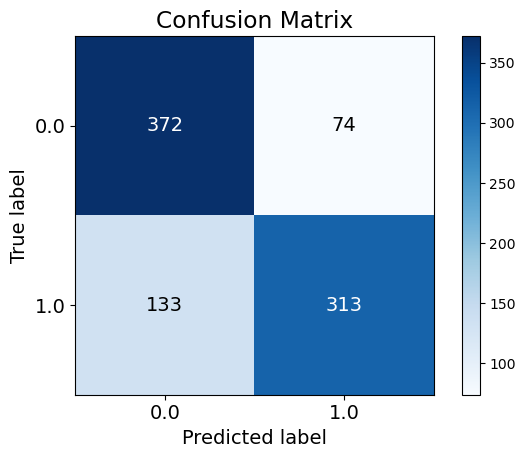

In [66]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

Accuracy Score 0.6602870813397129
Classification report: 
              precision    recall  f1-score   support

         0.0       0.77      0.62      0.69       127
         1.0       0.55      0.72      0.62        82

    accuracy                           0.66       209
   macro avg       0.66      0.67      0.66       209
weighted avg       0.69      0.66      0.66       209



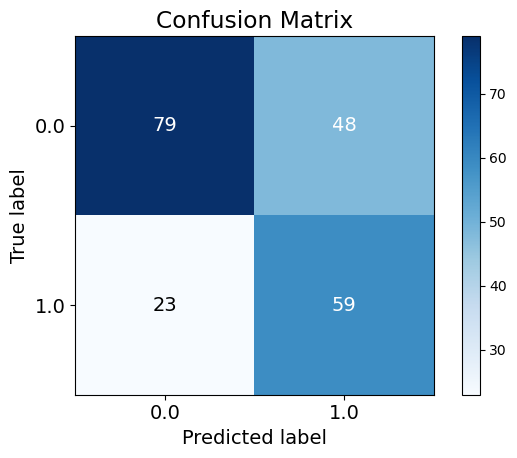

In [67]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [68]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [69]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Train Accuracy', accuracy_score(y_train, bag_clf.predict(X_train)))

OOB Score 0.7982062780269058
Test Accuracy 0.7416267942583732
Train Accuracy 0.952914798206278


Accuracy Score 0.7416267942583732
Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.78       127
         1.0       0.65      0.76      0.70        82

    accuracy                           0.74       209
   macro avg       0.73      0.74      0.74       209
weighted avg       0.75      0.74      0.74       209



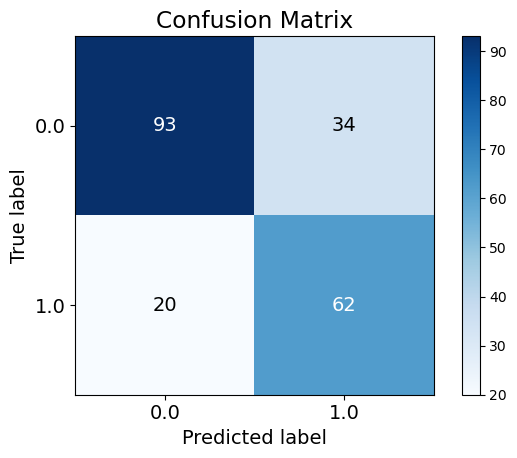

In [70]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

Accuracy Score 0.952914798206278
Classification report: 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       446
         1.0       0.96      0.95      0.95       446

    accuracy                           0.95       892
   macro avg       0.95      0.95      0.95       892
weighted avg       0.95      0.95      0.95       892



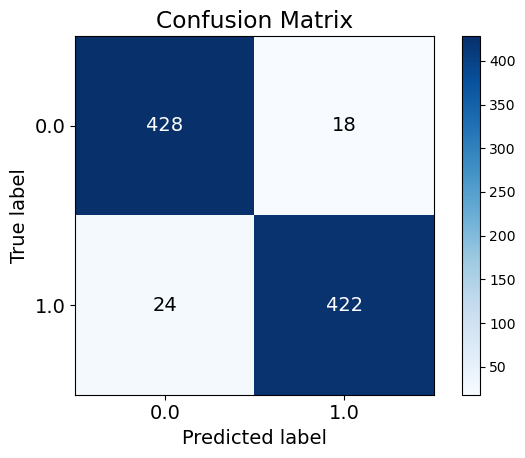

In [71]:
skplt.metrics.plot_confusion_matrix(y_train, bag_clf.predict(X_train));
save_fig('Confusion Matrix train for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_train, bag_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, bag_clf.predict(X_train))))

## impact of no. of estimators

In [72]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.726457399103139  test acc =  0.645933014354067 oob =  0.6121076233183856
Num of estimators:  100  train acc =  0.7275784753363229  test acc =  0.6363636363636364 oob =  0.6143497757847534
Num of estimators:  150  train acc =  0.7275784753363229  test acc =  0.6028708133971292 oob =  0.6042600896860987
Num of estimators:  200  train acc =  0.7242152466367713  test acc =  0.5933014354066986 oob =  0.6109865470852018
Num of estimators:  250  train acc =  0.7242152466367713  test acc =  0.5980861244019139 oob =  0.6177130044843049
Num of estimators:  300  train acc =  0.726457399103139  test acc =  0.5933014354066986 oob =  0.6233183856502242
Num of estimators:  350  train acc =  0.7286995515695067  test acc =  0.5980861244019139 oob =  0.6266816143497758
Num of estimators:  400  train acc =  0.7286995515695067  test acc =  0.5980861244019139 oob =  0.6233183856502242
Num of estimators:  450  train acc =  0.7320627802690582  test acc =  0.602870813397

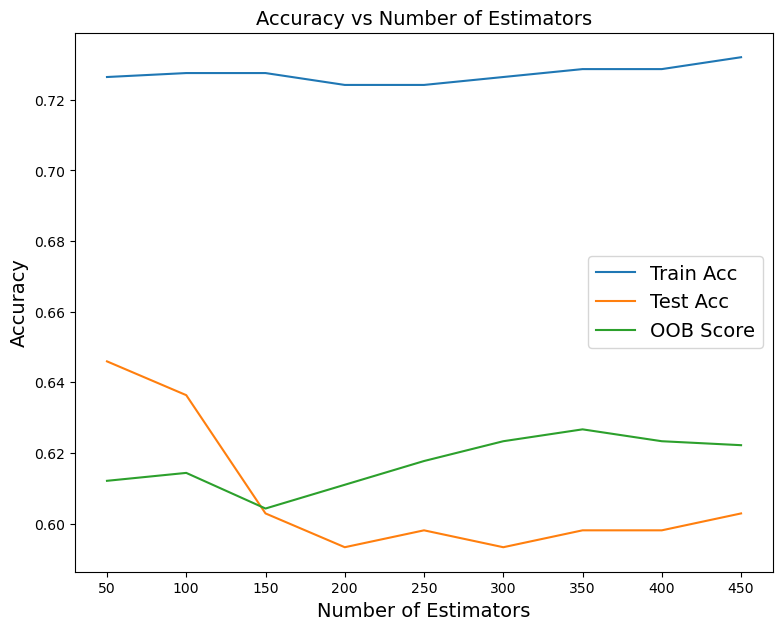

In [73]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6028708133971292

### Train Set

Accuracy Score 0.6266816143497758
Classification report: 
              precision    recall  f1-score   support

         0.0       0.63      0.62      0.62       446
         1.0       0.62      0.64      0.63       446

    accuracy                           0.63       892
   macro avg       0.63      0.63      0.63       892
weighted avg       0.63      0.63      0.63       892



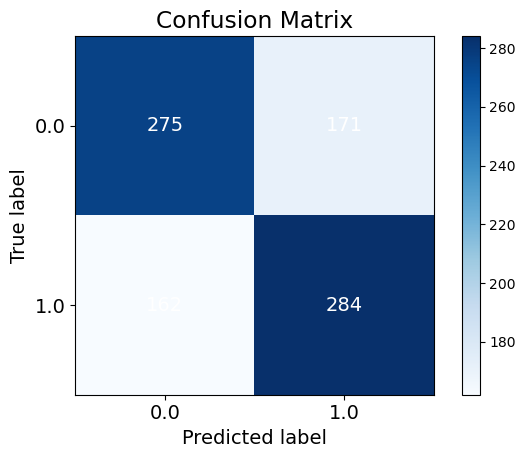

In [75]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

In [76]:
### Test Set

Accuracy Score 0.6028708133971292
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.60      0.65       127
         1.0       0.50      0.61      0.55        82

    accuracy                           0.60       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.62      0.60      0.61       209



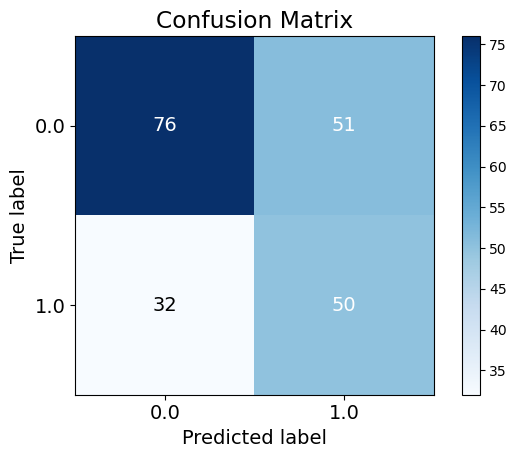

In [77]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [78]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

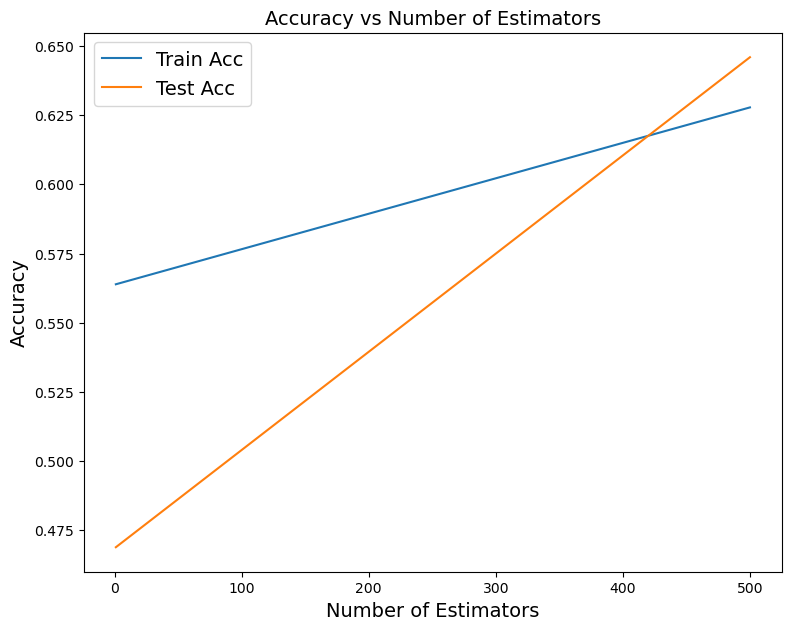

In [79]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [80]:
import xgboost as xgb

In [81]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.7081339712918661

### Train Set

Accuracy Score 0.9417040358744395
Classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       446
         1.0       0.96      0.92      0.94       446

    accuracy                           0.94       892
   macro avg       0.94      0.94      0.94       892
weighted avg       0.94      0.94      0.94       892



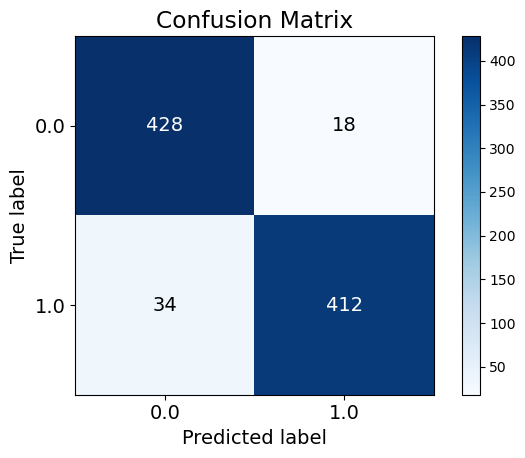

In [82]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

Accuracy Score 0.7081339712918661
Classification report: 
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75       127
         1.0       0.61      0.70      0.65        82

    accuracy                           0.71       209
   macro avg       0.70      0.71      0.70       209
weighted avg       0.72      0.71      0.71       209



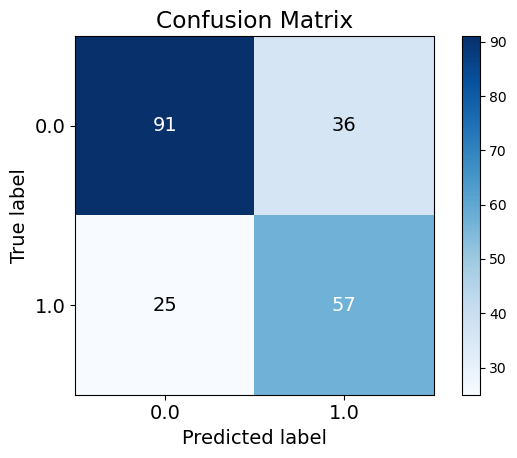

In [83]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Test Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [84]:
#conda install -c conda-forge ds-lime

In [85]:
from lime.lime_tabular import LimeTabularExplainer

In [86]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [87]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [88]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [89]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [90]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.1 0.9]]


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [91]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
Fjob_health <= 0.00 0.2017785674341551
Pstatus_A <= 0.00 0.12371969208777103
Fjob_other <= 0.00 -0.09717585653622005
Fjob_at_home <= 0.00 0.06586587583530235
famrel <= 0.75 0.06017035320626813
0.00 < Fjob_services <= 1.00 0.05119988652665356
Mjob_services > 0.00 0.05061232916340911
Fjob_teacher <= 0.00 0.048586503036090564
Medu <= 0.50 -0.03233150921546622
Mjob_at_home <= 0.00 0.03159643144524244
famsize_GT3 <= 0.00 0.03111812027693622
0.00 < famsup_yes <= 1.00 -0.021505572888832543
guardian_other <= 0.00 -0.01405443130664236
Mjob_other <= 0.00 0.010797958602120794
0.00 < guardian_mother <= 1.00 -0.008988896359859775
Mjob_health <= 0.00 -0.008210602356424148
guardian_father <= 0.00 -0.007451253489331651
Fedu <= 0.50 -0.005635665553250197
Mjob_teacher <= 0.00 0.0012029294827169451


### Feature Importance Plot

In [92]:
feature_importance = explanation_lime.as_list()


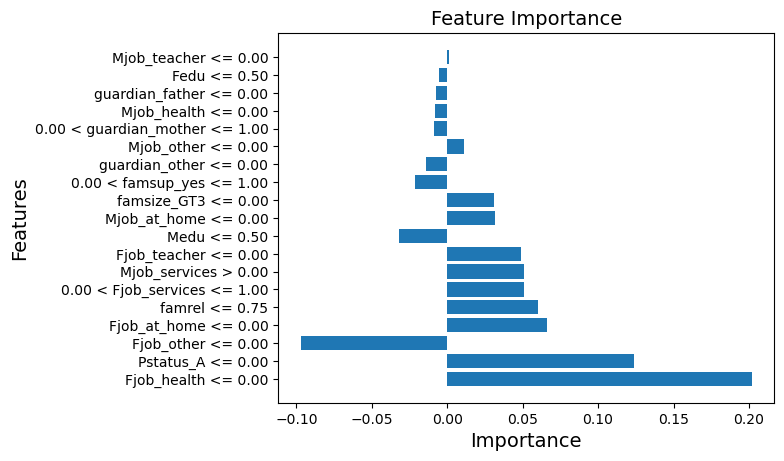

In [93]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [94]:
feature_contributions = explanation_lime.local_exp[1]

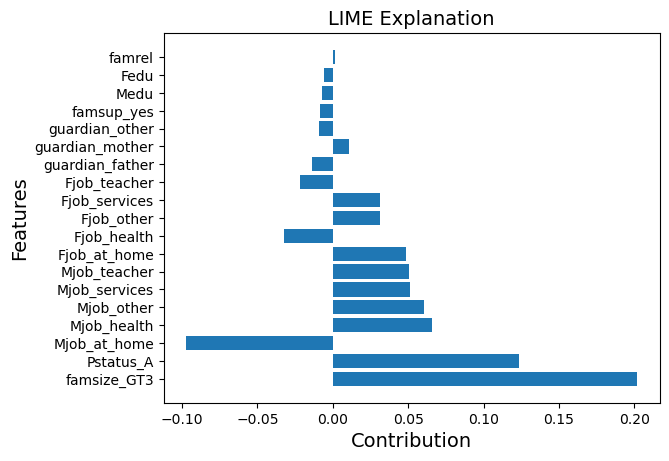

In [95]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [96]:
import matplotlib.pyplot as plt
print('Predicted: ',best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

Predicted:  1.0
Actual:  1.0


### Explanation for class 0

In [97]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


Predicted:  0.0
Actual:  0.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [98]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_rf.predict(X_test)}).head(10)

y_test  y_pred
0     1.0     1.0
1     1.0     1.0
2     1.0     0.0
3     1.0     1.0
4     0.0     0.0
5     0.0     1.0
6     0.0     1.0
7     1.0     1.0
8     0.0     0.0
9     0.0     0.0

# SHAP

In [99]:
import shap
import matplotlib.pyplot as plt

#model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)
#model.fit(X_train,y_train)

# Create a SHAP explainer
#explainer = shap.KernelExplainer(model.predict_proba,X_train)  # Replace "model" with your trained model
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_train)  # Replace "X" with your input data

# Plot the SHAP values for the selected instance
#shap.force_plot(explainer.expected_value, shap_values[0])

# Save the figures
#plt.savefig('images/shap_summary_plot.png', dpi=300)
#shap.save_html('images/shap_force_plot.html', shap.force_plot(explainer.expected_value, shap_values_instance, instance))

# Show the plots
#plt.show()


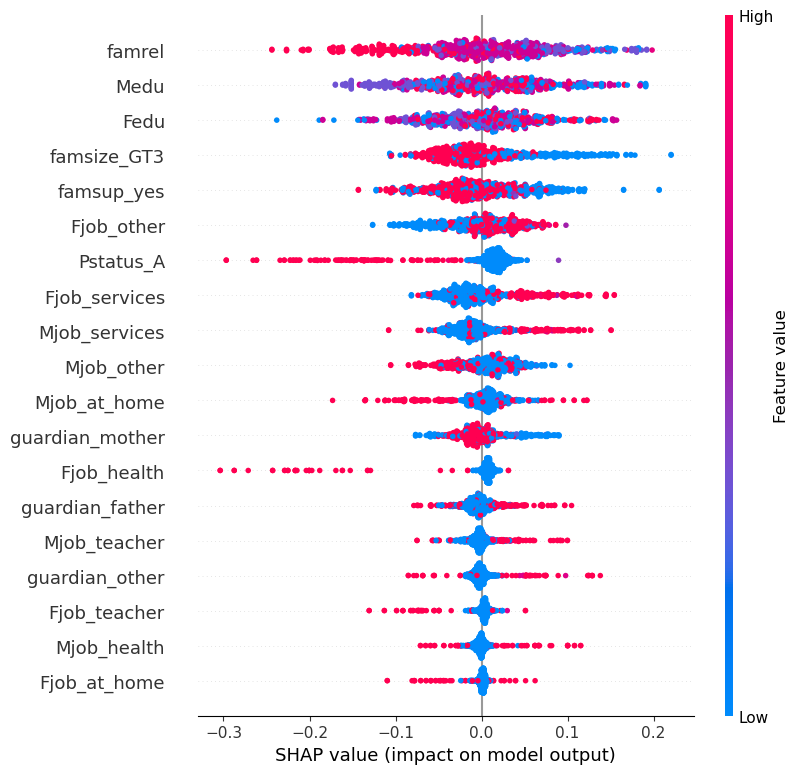

<Figure size 640x480 with 0 Axes>

In [100]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1],max_display=20)
plt.savefig('images/question 3/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')

In [101]:
pd.concat([X_test.loc[[190]],y_test.loc[[190]]], axis=1)

famsize_GT3  Pstatus_A  Mjob_at_home  Mjob_health  Mjob_other  \
190          1.0        0.0           0.0          0.0         1.0   

     Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  \
190            0.0           0.0           0.0          0.0         1.0   

     Fjob_services  Fjob_teacher  guardian_father  guardian_mother  \
190            0.0           0.0              0.0              1.0   

     guardian_other  famsup_yes  Medu  Fedu  famrel  alc  
190             0.0         1.0  0.25  0.25     0.5  1.0

In [102]:
# Calculate Shap values
choosen_instance = X_test.loc[[190]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ........penalty=l2, random_state=None, solver=lbfgs; total time=   

[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_

[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total

[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; to

[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] E